In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [2]:
data = "data/country_merged.csv"
df = pd.read_csv(data)

In [3]:
print(df.shape)
print(df.info())
display(df.head())

(151, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  151 non-null    object 
 1   Country Name  151 non-null    object 
 2   gdpp          151 non-null    float64
 3   gdp_growth    151 non-null    float64
 4   income        151 non-null    float64
 5   imports       151 non-null    float64
 6   exports       151 non-null    float64
 7   health        151 non-null    float64
 8   child_mort    151 non-null    float64
 9   total_fer     151 non-null    float64
 10  life_expec    151 non-null    float64
dtypes: float64(9), object(2)
memory usage: 13.1+ KB
None


,Country Code,Country Name,gdpp,gdp_growth,income,imports,exports,health,child_mort,total_fer,life_expec
0,AGO,Angola,2809.63,-0.62,1700.32,24.94,39.34,2.53,74.2,5.44,61.15
1,ARE,United Arab Emirates,42701.44,3.41,39305.78,70.85,96.84,4.28,6.8,1.39,77.97
2,ARG,Argentina,10056.64,-2.03,8160.57,14.52,17.70,9.51,9.1,2.25,76.67
3,ARM,Armenia,4604.65,7.60,4024.14,54.76,41.35,11.34,11.5,1.76,75.09
4,AUS,Australia,54875.29,2.11,42151.09,21.68,24.17,9.91,3.7,1.66,82.90


In [4]:
display(df.describe())

,gdpp,gdp_growth,income,imports,exports,health,child_mort,total_fer,life_expec
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,15038.909868,3.075894,11883.628675,45.896887,41.998808,6.319007,27.370861,2.668278,72.689801
std,20645.043055,3.027638,15541.688284,25.233009,29.092343,2.546684,28.819497,1.287027,7.636730
min,228.210000,-7.160000,199.890000,0.590000,0.630000,1.800000,2.000000,0.920000,53.280000
25%,1919.675000,1.425000,1596.195000,29.755000,23.840000,4.105000,5.850000,1.660000,67.200000
50%,5980.630000,2.980000,4707.820000,40.710000,36.440000,6.200000,14.800000,2.230000,74.250000
75%,18037.670000,4.840000,15114.480000,54.980000,50.880000,7.835000,43.350000,3.545000,77.940000
max,113218.710000,19.540000,65600.060000,174.620000,205.480000,16.770000,116.900000,6.820000,84.360000


### 使うデータを抽出

In [5]:
dfX = df[['gdpp', 'imports']]
print(dfX.shape)
display(dfX.head())

(151, 2)


,gdpp,imports
0,2809.63,24.94
1,42701.44,70.85
2,10056.64,14.52
3,4604.65,54.76
4,54875.29,21.68


### 標準化

In [6]:
X_scaled = scale(dfX) ## 標準化

In [7]:
## 標準化前の確認
print(dfX.mean()) ## 平均
print(dfX.std(ddof=0))  ## 標準偏差

gdpp       15038.909868
imports       45.896887
dtype: float64
gdpp       20576.568429
imports       25.149317
dtype: float64


In [8]:
## 標準化後の確認
print(X_scaled.mean(axis=0)) ## 平均
print(X_scaled.std(ddof=0, axis=0)) ## 標準偏差
## 標準化後のデータ型はnumpy配列になる

[-2.35279052e-17 -2.35279052e-17]
[1. 1.]


### データフレームを作成

In [9]:
dfX_scaled = pd.DataFrame(X_scaled, columns=dfX.columns)
display(dfX_scaled.head())

,gdpp,imports
0,-0.594330,-0.833298
1,1.344370,0.992198
2,-0.242133,-1.247624
3,-0.507094,0.352420
4,1.936007,-0.962924


### 散布図を図示

Text(0, 0.5, 'imports (scaled)')

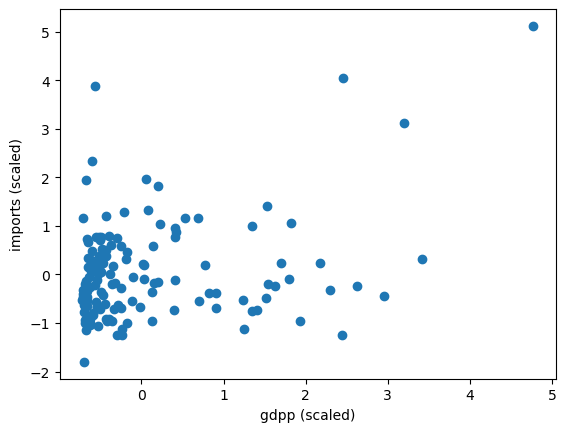

In [10]:
plt.scatter(dfX_scaled['gdpp'], dfX_scaled['imports'], marker='o')
plt.xlabel('gdpp (scaled)')
plt.ylabel('imports (scaled)')

### 妥当なクラスタ数を決める(Elbow法)

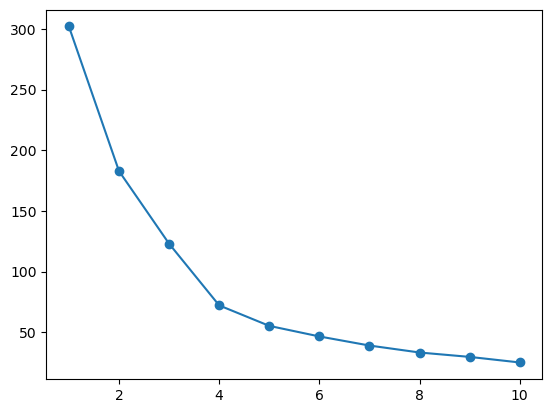

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(dfX_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')

↑折れが急な4が妥当なクラスタ数

### K-meansクラスタリングを実行

In [12]:
km = KMeans(n_clusters=4, n_init=10, random_state=7)
## n_clusters = 何個のクラスタに分けるか指定
## n_init = クラスタリングを行う回数(今回は10回異なる初期状態で計算を行う)
## random_state = 適当な整数に固定
cls = km.fit_predict(dfX_scaled) ## クラスタリングを実行
print(cls)


[0 3 0 2 3 3 0 0 3 0 0 0 2 2 3 2 2 2 0 0 0 3 0 0 0 3 3 0 0 0 0 0 2 0 0 2 0
 2 2 3 2 3 0 0 0 0 3 2 0 3 2 3 0 2 0 0 0 0 0 0 0 2 2 0 2 0 0 1 0 3 3 3 2 0
 3 0 0 2 2 3 0 0 2 2 1 2 0 2 0 2 0 2 0 0 2 2 2 0 2 2 0 0 0 0 3 3 0 3 0 0 0
 0 0 2 0 0 3 0 0 0 0 0 0 1 0 0 0 2 2 2 3 0 2 0 0 0 0 2 2 0 0 0 0 0 3 0 2 0
 2 0 0]


### 結果

In [13]:
df["cluster_n"] = cls  ## クラスタリングの結果をdfに追加
display(df.head())

,Country Code,Country Name,gdpp,gdp_growth,income,imports,exports,health,child_mort,total_fer,life_expec,cluster_n
0,AGO,Angola,2809.63,-0.62,1700.32,24.94,39.34,2.53,74.2,5.44,61.15,0
1,ARE,United Arab Emirates,42701.44,3.41,39305.78,70.85,96.84,4.28,6.8,1.39,77.97,3
2,ARG,Argentina,10056.64,-2.03,8160.57,14.52,17.70,9.51,9.1,2.25,76.67,0
3,ARM,Armenia,4604.65,7.60,4024.14,54.76,41.35,11.34,11.5,1.76,75.09,2
4,AUS,Australia,54875.29,2.11,42151.09,21.68,24.17,9.91,3.7,1.66,82.90,3


In [14]:
print(df["cluster_n"].value_counts())  ## 各クラスタのデータ数

cluster_n
0    84
2    40
3    24
1     3
Name: count, dtype: int64


In [15]:
for i in range(4):  ## 各クラスタのデータを表示
    print('Cluster No.', i)
    display(df[ df['cluster_n']==i ])

Cluster No. 0


,Country Code,Country Name,gdpp,gdp_growth,income,imports,exports,health,child_mort,total_fer,life_expec,cluster_n
0,AGO,Angola,2809.63,-0.62,1700.32,24.94,39.34,2.53,74.2,5.44,61.15,0
2,ARG,Argentina,10056.64,-2.03,8160.57,14.52,17.70,9.51,9.1,2.25,76.67,0
6,AZE,Azerbaijan,4805.75,2.50,3501.65,36.77,49.05,4.04,20.4,1.80,73.00,0
7,BDI,Burundi,228.21,1.84,199.89,32.73,9.13,7.99,56.6,5.32,61.58,0
9,BEN,Benin,1219.52,6.87,1058.62,34.05,29.63,2.39,88.4,4.77,61.77,0
10,BFA,Burkina Faso,796.12,5.69,672.73,31.05,27.62,5.46,87.8,5.11,61.58,0
11,BGD,Bangladesh,1855.74,8.15,1777.28,21.44,15.32,2.48,30.7,2.01,72.59,0
18,BOL,Bolivia,3552.07,2.22,2986.57,31.43,24.97,6.92,26.3,2.69,71.51,0
19,BRA,Brazil,8897.55,1.41,7628.83,14.35,14.11,9.59,14.9,1.72,75.88,0
20,BRB,Barbados,18148.50,-0.10,15641.53,41.68,42.01,6.30,12.6,1.62,79.19,0


Cluster No. 1


,Country Code,Country Name,gdpp,gdp_growth,income,imports,exports,health,child_mort,total_fer,life_expec,cluster_n
67,IRL,Ireland,80886.62,4.92,43036.41,124.41,127.93,6.68,3.2,1.70,82.30,1
84,LUX,Luxembourg,113218.71,3.28,60409.15,174.62,205.48,5.37,2.8,1.34,82.45,1
123,SGP,Singapore,65640.71,1.35,48343.60,147.63,175.89,4.08,2.4,1.14,83.50,1


Cluster No. 2


,Country Code,Country Name,gdpp,gdp_growth,income,imports,exports,health,child_mort,total_fer,life_expec,cluster_n
3,ARM,Armenia,4604.65,7.60,4024.14,54.76,41.35,11.34,11.5,1.76,75.09,2
12,BGR,Bulgaria,9879.27,4.04,8260.46,60.71,63.93,7.13,6.6,1.58,74.91,2
13,BHR,Bahrain,23551.93,2.14,19490.59,65.22,76.49,4.01,7.0,1.96,77.29,2
15,BIH,Bosnia and Herzegovina,6119.76,2.83,5113.45,55.20,40.48,9.05,5.9,1.25,77.40,2
16,BLR,Belarus,6837.72,1.40,5282.87,65.76,65.09,5.86,3.1,1.38,74.23,2
17,BLZ,Belize,5078.81,1.76,3549.72,59.00,51.02,5.97,12.3,2.27,74.62,2
32,COG,"Congo, Rep.",2369.73,-0.09,658.04,53.16,73.79,2.08,52.5,4.37,64.57,2
35,CPV,Cabo Verde,3603.78,5.67,2997.51,65.26,50.65,4.94,14.9,2.24,72.98,2
37,CYP,Cyprus,29206.08,5.28,24307.11,75.38,75.59,7.01,2.8,1.32,80.98,2
38,CZE,Czech Republic,23660.15,3.03,17342.72,67.90,73.89,7.83,3.0,1.71,79.13,2


Cluster No. 3


,Country Code,Country Name,gdpp,gdp_growth,income,imports,exports,health,child_mort,total_fer,life_expec,cluster_n
1,ARE,United Arab Emirates,42701.44,3.41,39305.78,70.85,96.84,4.28,6.8,1.39,77.97,3
4,AUS,Australia,54875.29,2.11,42151.09,21.68,24.17,9.91,3.7,1.66,82.90,3
5,AUT,Austria,50114.40,1.49,41179.55,52.04,55.44,10.43,3.6,1.46,81.79,3
8,BEL,Belgium,46591.49,2.15,38208.45,81.53,82.19,10.66,4.2,1.57,81.75,3
14,BHS,"Bahamas, The",33799.42,0.70,31439.34,36.31,35.03,5.75,22.4,1.74,73.92,3
21,BRN,Brunei Darussalam,31085.96,3.87,24693.88,50.56,57.95,2.16,11.4,1.82,75.86,3
25,CAN,Canada,46338.34,1.88,37829.48,33.50,31.91,10.84,5.1,1.47,82.05,3
26,CHE,Switzerland,85334.52,1.21,65600.06,53.68,65.53,11.29,4.0,1.48,83.70,3
39,DEU,Germany,46794.90,1.06,39093.20,40.98,46.62,11.70,3.7,1.54,80.94,3
41,DNK,Denmark,59775.74,2.11,51806.74,51.61,59.00,9.96,3.7,1.70,81.20,3


### 散布図を図示

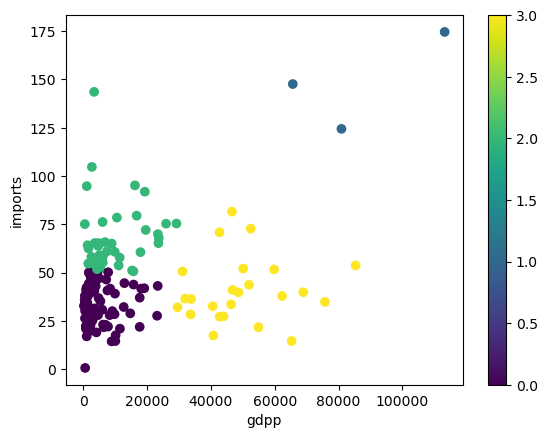

In [16]:
plt.scatter(df['gdpp'], df['imports'], marker='o', c=df['cluster_n'])
plt.xlabel('gdpp')
plt.ylabel('imports')
plt.colorbar()